In [4]:
import numpy as np
from quickgrad import vector
a = vector(np.random.randn(2,2))
b = vector(np.random.randn(2,5))
c = a @ b
c.shape

<bound method vector.shape of vector(data=[[-0.12192579 -0.09495713  0.20161266  0.1400407   0.15996425]
 [ 0.23882634  1.52749729 -1.21163489 -1.8751247  -2.363551  ]])>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from typing import *
import torch

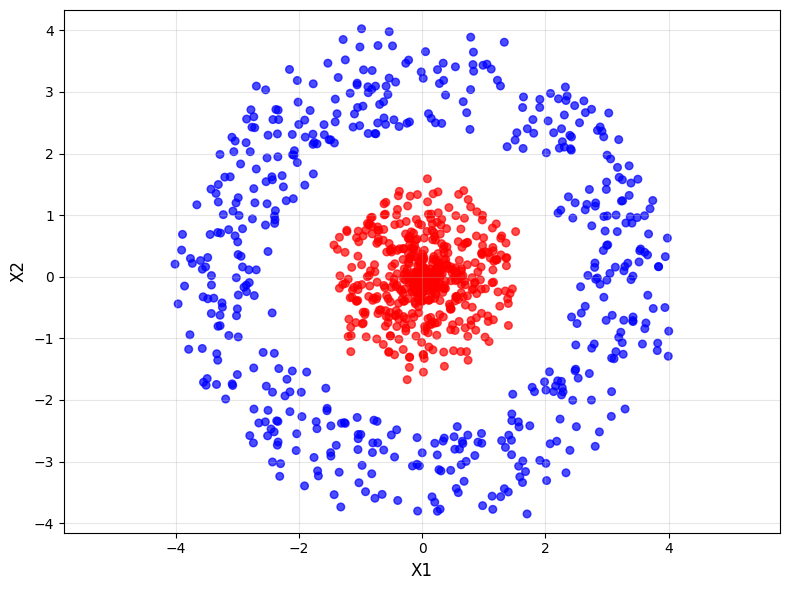

In [ ]:
np.random.seed(42)

n_samples = 1000

def make_circles(n_samples):
    n_inner = n_samples // 2
    n_outer = n_samples // 2
    
    # Inner circle (class 0)
    theta_inner = np.random.uniform(0, 2*np.pi, n_inner)
    r_inner = np.random.uniform(0.0, 1.5, n_inner)
    x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, 0.1, n_inner)
    y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, 0.1, n_inner)
    
    # Outer circle (class 1)
    theta_outer = np.random.uniform(0, 2*np.pi, n_outer)
    r_outer = np.random.uniform(2.5, 4.0, n_outer)
    x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, 0.1, n_outer)
    y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, 0.1, n_outer)
    
    X = np.column_stack([np.concatenate([x_inner, x_outer]), 
                         np.concatenate([y_inner, y_outer])])
    y = np.concatenate([np.zeros(n_inner), np.ones(n_outer)])
    return X, y

# Generate the circles dataset
X, y = make_circles(n_samples)

# Create single plot
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=30)
# plt.title('Concentric Circles Classification Dataset\n(Red=0, Blue=1)', fontsize=14, fontweight='bold')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Make circles look circular
plt.tight_layout()
plt.show()



In [3]:
from quickgrad import vector, optim
import quickgrad.nn as nn
from quickgrad.nn._losses import *
from quickgrad.nn.linear import Linear
import numpy as np
from quickgrad.nn._acts_modules import Sigmoid

In [4]:
in_feats, out_feats = 2, 1

# model = nn.Sequential()
# model.append(nn.Linear(in_feats, out_feats))
# model.append(nn.Sigmoid())
model = nn.Sequential(
    nn.Linear(in_feats, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, out_feats),
    nn.Sigmoid()    
)

In [5]:
X, y = make_circles(100)
y = np.expand_dims(y, -1)

X_train = vector(X.tolist())
y_train = vector(y.tolist())

print("Training data: ", X_train)
print("Training data shape: ", X_train.shape)
print("Labels: ", y_train)
print("Labels shape: ", y_train.shape)

Training data:  vector(data=[[ 0.19609623  0.03585737]
 [-0.34786078  0.44264632]
 [-0.80414815 -1.05663159]
 [ 0.05421907  0.16548406]
 [ 1.01312938  1.14111427]
 [ 0.14492925 -0.1410697 ]
 [ 1.02532154 -0.4385453 ]
 [ 0.54976402 -0.51403778]
 [-1.07709965 -1.013846  ]
 [ 0.31933608 -0.58687361]
 [ 0.82852523  0.34194075]
 [-0.23340384  0.32943994]
 [-0.24706011  0.16881331]
 [-0.91412354 -0.99856916]
 [-0.31247791  0.41785467]
 [ 0.3871105   0.25946866]
 [-0.84174843 -0.44776081]
 [ 0.19409598 -0.33814861]
 [-0.86843551  0.92390144]
 [ 0.76856435  0.70738108]
 [ 0.25995469  0.88109311]
 [-0.0573472   1.32592837]
 [-0.04921402  0.10634871]
 [-0.2741702  -0.28221803]
 [-0.46585728 -0.36273341]
 [-0.06690486 -0.17638417]
 [-0.84263915  0.9053062 ]
 [ 0.63544344 -1.33741399]
 [ 0.24799147  0.74564532]
 [-0.35071685  0.26326192]
 [ 0.54253658 -1.05387529]
 [ 0.35959611  0.49170528]
 [ 0.57163797  0.49139866]
 [ 0.43159801 -0.56029496]
 [-0.62716952  1.19359957]
 [-0.47776876 -0.8356364 ]


In [6]:
lr = 0.01
epochs = 450

loss_fn = nn.BCELoss()
from quickgrad import vector, optim
opt = optim.Adam(model.parameters(), lr=lr)

In [7]:
import tqdm
import time

# loop = tqdm.tqdm(range(epochs))
losses = []

bce_loss = BCELoss()

start = time.time()
for epoch in range(epochs):
    X_train.requires_grad = False
    y_pred = model.forward(X_train)
    loss = bce_loss.forward(y_train, y_pred)
    print(loss)
    opt.zero_grad()
    loss.backward()
    opt.step()
    lossval = loss.data.item()
    losses.append(lossval)
    # loop.set_postfix(loss=lossval)

end = time.time()
print(f"Finished training in {end - start} seconds...")

vector(data=[[8.05921583]])
bcd
vector(data=[[8.05892733]])
bcd
vector(data=[[8.05866523]])
bcd
vector(data=[[8.05828041]])
bcd
vector(data=[[8.05764293]])
bcd
vector(data=[[8.05663754]])
bcd
vector(data=[[8.05513343]])
bcd
vector(data=[[8.0529499]])
bcd
vector(data=[[8.04983736]])
bcd
vector(data=[[8.04546032]])
bcd
vector(data=[[8.03942221]])
bcd
vector(data=[[8.03207957]])
bcd
vector(data=[[8.02380469]])
bcd
vector(data=[[8.01308548]])
bcd
vector(data=[[7.99924111]])
bcd
vector(data=[[7.98208813]])
bcd
vector(data=[[7.9616644]])
bcd
vector(data=[[7.93756685]])
bcd
vector(data=[[7.90966132]])
bcd
vector(data=[[7.87736968]])
bcd
vector(data=[[7.83931445]])
bcd
vector(data=[[7.79422026]])
bcd
vector(data=[[7.74090136]])
bcd
vector(data=[[7.67830867]])
bcd
vector(data=[[7.60498948]])
bcd
vector(data=[[7.52157898]])
bcd
vector(data=[[7.42597631]])
bcd
vector(data=[[7.31665006]])
bcd
vector(data=[[7.19279353]])
bcd
vector(data=[[7.05216033]])
bcd
vector(data=[[6.89298009]])
bcd
vector(dat

bcd
vector(data=[[0.00064074]])
bcd
vector(data=[[0.00063512]])
bcd
vector(data=[[0.00062956]])
bcd
vector(data=[[0.00062407]])
bcd
vector(data=[[0.00061866]])
bcd
vector(data=[[0.00061332]])
bcd
vector(data=[[0.00060804]])
bcd
vector(data=[[0.00060284]])
bcd
vector(data=[[0.0005977]])
bcd
vector(data=[[0.00059262]])
bcd
vector(data=[[0.00058761]])
bcd
vector(data=[[0.00058265]])
bcd
vector(data=[[0.00057777]])
bcd
vector(data=[[0.00057294]])
bcd
vector(data=[[0.00056816]])
bcd
vector(data=[[0.00056346]])
bcd
vector(data=[[0.00055882]])
bcd
vector(data=[[0.00055422]])
bcd
vector(data=[[0.00054969]])
bcd
vector(data=[[0.0005452]])
bcd
vector(data=[[0.00054077]])
bcd
vector(data=[[0.00053639]])
bcd
vector(data=[[0.00053207]])
bcd
vector(data=[[0.0005278]])
bcd
vector(data=[[0.00052358]])
bcd
vector(data=[[0.00051941]])
bcd
vector(data=[[0.00051528]])
bcd
vector(data=[[0.00051121]])
bcd
vector(data=[[0.00050718]])
bcd
vector(data=[[0.0005032]])
bcd
vector(data=[[0.00049927]])
bcd
vector(d

In [8]:
preds = model.forward(X_train).data

In [9]:
preds

array([[1.29969860e-08],
       [6.12163942e-07],
       [9.75885203e-07],
       [2.02081448e-08],
       [1.16228060e-04],
       [1.31117437e-08],
       [4.70964101e-06],
       [1.73437614e-07],
       [9.23890692e-06],
       [7.51043922e-08],
       [2.69227159e-07],
       [1.80705352e-07],
       [6.30287782e-08],
       [2.21220062e-06],
       [5.33270418e-07],
       [2.58729274e-08],
       [7.04974999e-07],
       [1.78897019e-08],
       [2.59233311e-05],
       [1.08141395e-06],
       [8.05104776e-07],
       [3.10847250e-05],
       [1.76102559e-08],
       [9.02656635e-09],
       [3.06029452e-08],
       [7.41680764e-09],
       [2.16437246e-05],
       [1.39773861e-04],
       [3.94769442e-07],
       [2.41288037e-07],
       [3.67300802e-06],
       [7.29102914e-08],
       [1.60894164e-07],
       [9.20090603e-08],
       [8.40695710e-05],
       [1.78680363e-07],
       [2.03184133e-06],
       [2.44292598e-06],
       [9.67769735e-08],
       [1.94615088e-07],


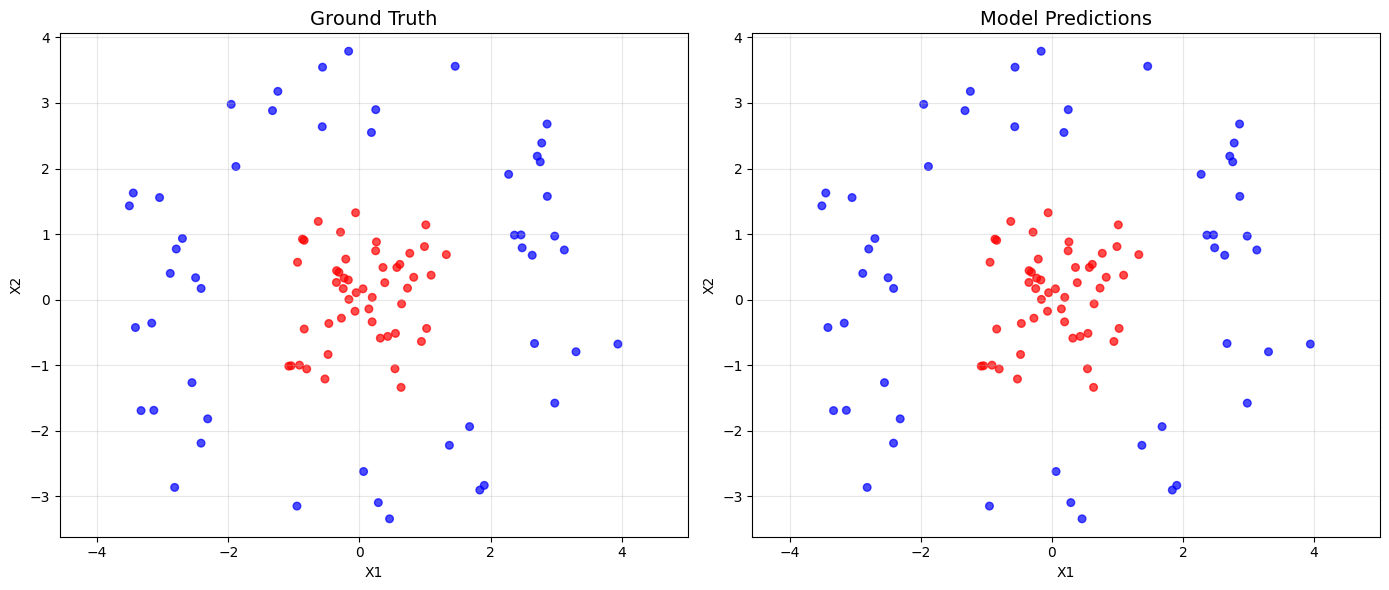

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ypred = preds > 0.5  
ypred = ypred.astype(int).flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in y], alpha=0.7, s=30)
axes[0].set_title("Ground Truth", fontsize=14)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].grid(True, alpha=0.3)
axes[0].axis('equal')

axes[1].scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in ypred], marker='o', alpha=0.7, s=30)
axes[1].set_title("Model Predictions", fontsize=14)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].grid(True, alpha=0.3)
axes[1].axis('equal')

plt.tight_layout()
plt.show()
